In [1]:
import numpy as np
import scipy.linalg as lin
import pandas as pd  # hors du cours mais cela vous permet de voir Pandas en action
from matplotlib import pylab as plt

pd.set_option("display.max.columns", None)
%matplotlib inline
#plt.rcParams['figure.figsize']=[15,10]

In [2]:
fifa19 = pd.read_csv('data/fifa19.csv.bz2')

In [3]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
# on simplifie les postes
fifa19.loc[fifa19['Position'] == 'GK', 'Poste'] = 'GK'
fifa19.loc[fifa19['Position'].isin(['RWB','RCB','RB','LWB','LCB','LB','CB']), 'Poste'] = 'DEF'
fifa19.loc[fifa19['Position'].isin(['RM','RDM','RDM','RAM','LM','LDM','LCM','LAM','CM','CDM','CAM']),'Poste']='MID'
fifa19.loc[fifa19['Position'].isin(['ST','RW','RS','RF','LW','LS','LF','CF']), 'Poste'] = 'FWD'

In [5]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Poste
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,FWD
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,FWD
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,FWD
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
columns = ['Age', 'Overall', 'Value', 'Wage', 'Height', 'Weight', \
            'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', \
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', \
            'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', \
            'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', \
            'Composure', 'Marking', 'StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', \
            'GKPositioning', 'GKReflexes']
data = fifa19[columns].copy()
data.dropna(inplace=True)

In [7]:
def money(x):
    try:
        res = 1000 if x[-1] == 'M' else 1
        res *= float(x[1:-1])
        return int(res)
    except:
        return np.nan

def to_meters(x):
    try:
        x = x.split("'")
        return int(30.48 * float(x[0]) + 2.54 * float(x[1]))
    except:
        return np.nan
               
data['Value'] = data['Value'].apply(money)
data['Wage'] = data['Wage'].apply(money)
data['Height'] = data['Height'].apply(to_meters)
data['Weight'] = data['Weight'].apply(lambda x: int(0.453592 * float(x[:-3])))
data.dropna(inplace=True)

In [8]:
data_mean = data.mean(axis=0)
data -= data_mean   # on centre les données

In [9]:
value = data['Value'].values
wage = data['Wage'].values
overall = data['Overall'].values
data.drop(columns=['Value', 'Wage', 'Overall'], inplace=True)

In [10]:
data = data.to_xarray().to_array().values

In [11]:
data

array([[  5.90439493,   7.90439493,   0.90439493, ...,  -9.09560507,
         -8.09560507,  -9.09560507],
       [-10.68582119,   6.31417881,  -5.68582119, ...,  -8.68582119,
         -3.68582119,  -3.68582119],
       [ -2.79873792,   8.20126208,  -6.79873792, ...,  -7.79873792,
         -5.79873792,   4.20126208],
       ...,
       [ -1.20310493,  -1.20310493,  -1.20310493, ...,  -6.20310493,
         -2.20310493,  -7.20310493],
       [ -2.35606188,  -2.35606188,  -1.35606188, ..., -10.35606188,
         -8.35606188,  -4.35606188],
       [ -8.68207963,  -5.68207963,  -5.68207963, ...,  -3.68207963,
         -7.68207963,  -7.68207963]])

In [12]:
N,M = data.shape
N, M

(36, 17907)

## SVD

Faire la décomposition en valeurs singulières de `data`
et vérfier que le résultat donne bien notre matrice de départ.
Attention il faut reconstruire $\Sigma$ avec les bonnes dimensions.

In [13]:
U, S, VT = lin.svd(data)

In [14]:
S = np.diag(S)

In [15]:
S

array([[9860.96189178,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 5144.70462278,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        , 3164.14612818, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  397.52911902,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         391.19189944,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  388.24871337]])

In [16]:
U.shape, S.shape, VT.shape

((36, 36), (36, 36), (17907, 17907))

In [17]:
to_add = np.zeros((N, M - N))
to_add.shape

(36, 17871)

In [18]:
S2 = np.hstack((S, to_add))
S2.shape

(36, 17907)

In [19]:
data2 = U @ S2 @ VT

In [20]:
data2

array([[  5.90439493,   7.90439493,   0.90439493, ...,  -9.09560507,
         -8.09560507,  -9.09560507],
       [-10.68582119,   6.31417881,  -5.68582119, ...,  -8.68582119,
         -3.68582119,  -3.68582119],
       [ -2.79873792,   8.20126208,  -6.79873792, ...,  -7.79873792,
         -5.79873792,   4.20126208],
       ...,
       [ -1.20310493,  -1.20310493,  -1.20310493, ...,  -6.20310493,
         -2.20310493,  -7.20310493],
       [ -2.35606188,  -2.35606188,  -1.35606188, ..., -10.35606188,
         -8.35606188,  -4.35606188],
       [ -8.68207963,  -5.68207963,  -5.68207963, ...,  -3.68207963,
         -7.68207963,  -7.68207963]])

In [21]:
data2.shape

(36, 17907)

In [22]:
(data * data - data2 * data2).sum()

-2.4312129981649203e-07

## Valeur des joueurs

Trouver la formule magique qu'utilise le jeu pour donner une note globale aux joueur (`overall`).
Pour cela
on utilisera la SVD de `data` et `overall` afin de résoudre au mieux le système matriciel associé (il
va falloir calculer le speudo-inverse). Avec la solution on calcule notre estimation de la valeur
globale des joueurs.

On affichera sur un même graphique 2 courbes :

* les estimations faites par notre SVD (dans `estimation`)
* la valeur `overall` donnée par le jeu

Pour que cela soit plus lisible, il faut un index `idx` des joueurs triés dans l'ordre de leur note globale (`overall`).
Pour cela `argsort` vous sera utile.

In [23]:
to_add2 = np.zeros((M - N, N))
to_add2.shape

(17871, 36)

In [24]:
S2 = np.vstack((np.diag(1/np.diag(S)), to_add2))

In [25]:
VT.T.shape, S2.shape, U.T.shape

((17907, 17907), (17907, 36), (36, 36))

In [26]:
AP = VT.T @ S2 @ U.T

In [27]:
AP.shape, overall.shape

((17907, 36), (17907,))

In [28]:
magic = AP.T @ overall
magic.shape

(36,)

In [29]:
data.T @ magic

array([ 21.87742673,  24.59591524,  20.21553305, ..., -15.64734968,
       -20.57549513, -10.1780954 ])

In [30]:
estimation = data.T @ magic
idx = np.argsort(overall)

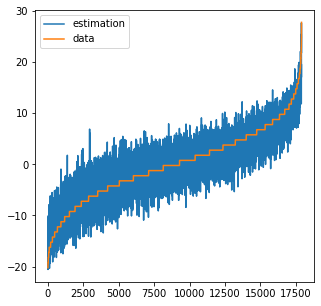

In [31]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(M), estimation[idx], label='estimation')
plt.plot(np.arange(M), overall[idx], label='data')
plt.legend()

## Par poste

Regardons si on a de meilleurs résultats avec une selection des joueurs ayant le même poste. Les postes possibles
sont `GK`, `DEF`, `MID` et `FWD`.

Afficher pour chaque poste la note globale des joueurs et l'estimation comme dans le cas général.

In [32]:
def data_par_poste(poste):
    data = fifa19[fifa19['Poste'] == poste][columns].copy()
    data['Value'] = data['Value'].apply(money)
    data['Wage'] = data['Wage'].apply(money)
    data['Height'] = data['Height'].apply(to_meters)
    data['Weight'] = data['Weight'].apply(lambda x: int(0.453592 * float(x[:-3])))
    data.dropna(inplace=True)

    data_mean = data.mean(axis=0)
    data -= data_mean

    value = data['Value'].values
    wage = data['Wage'].values
    overall = data['Overall'].values
    data.drop(columns=['Value', 'Wage', 'Overall'], inplace=True)

    return data.to_xarray().to_array(), overall, value, wage

In [33]:
def plot_poste_vs_what(data, what, ax=plt, title=None):
    
    data = data.values
    
    N,M = data.shape
    U, S, VT = lin.svd(data)
    
    to_add2 = np.zeros((M - N, N))
    S2 = np.vstack((np.diag(1/S), to_add2))
    
    AP = VT.T @ S2 @ U.T
    magic = AP.T @ what
    
    estimation = data.T @ magic
    idx = np.argsort(what)
    
    ax.plot(np.arange(M), estimation[idx], label='estimation')
    ax.plot(np.arange(M), what[idx], label='data')
    if title != None:
        ax.set_title(title)
    ax.legend()

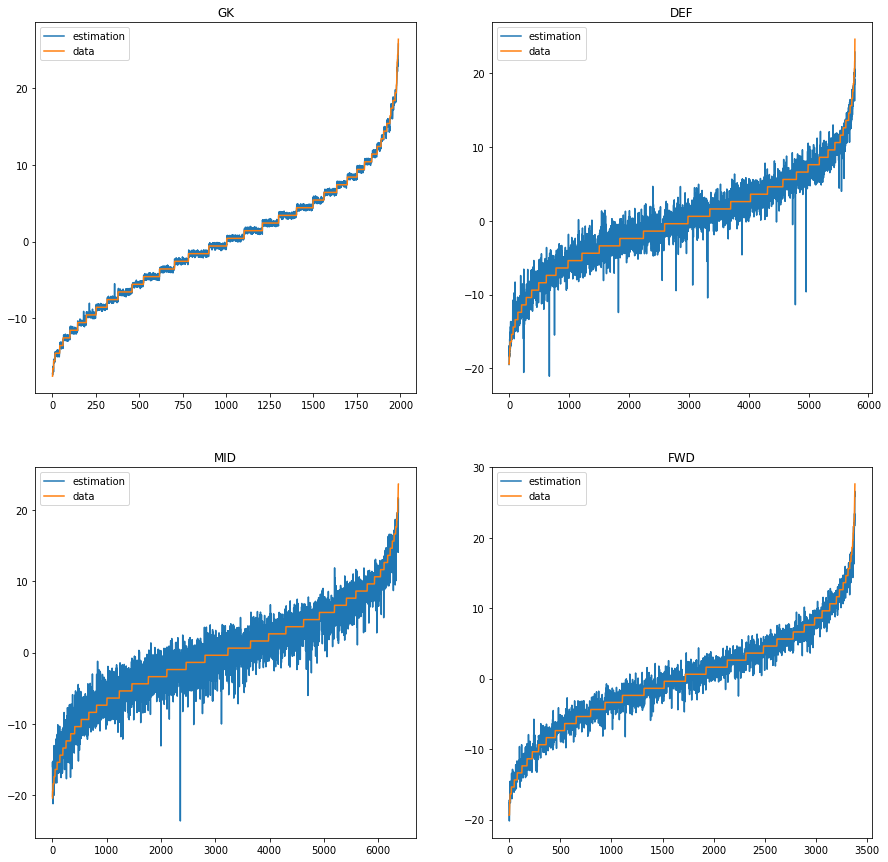

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste(p)
    plot_poste_vs_what(data, overall, ax=ax[i//2, i%2], title=p)

## Argent par poste

Regarder ce que donne l'estimation du salaire, `wage`, des joueurs. Pour cela on
trace les mêmes courbes que précédemment en ordonnant les joueurs suivant leur salaire ou leur valeur suivant
le cas.

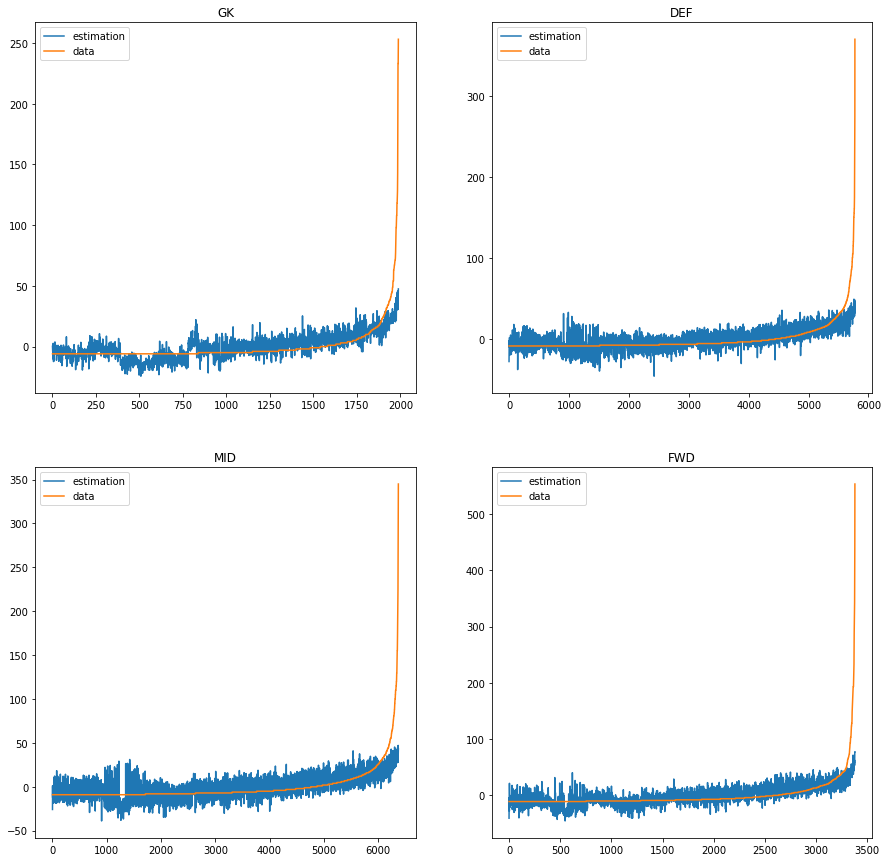

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste(p)
    plot_poste_vs_what(data, wage, ax=ax[i//2, i%2], title=p)

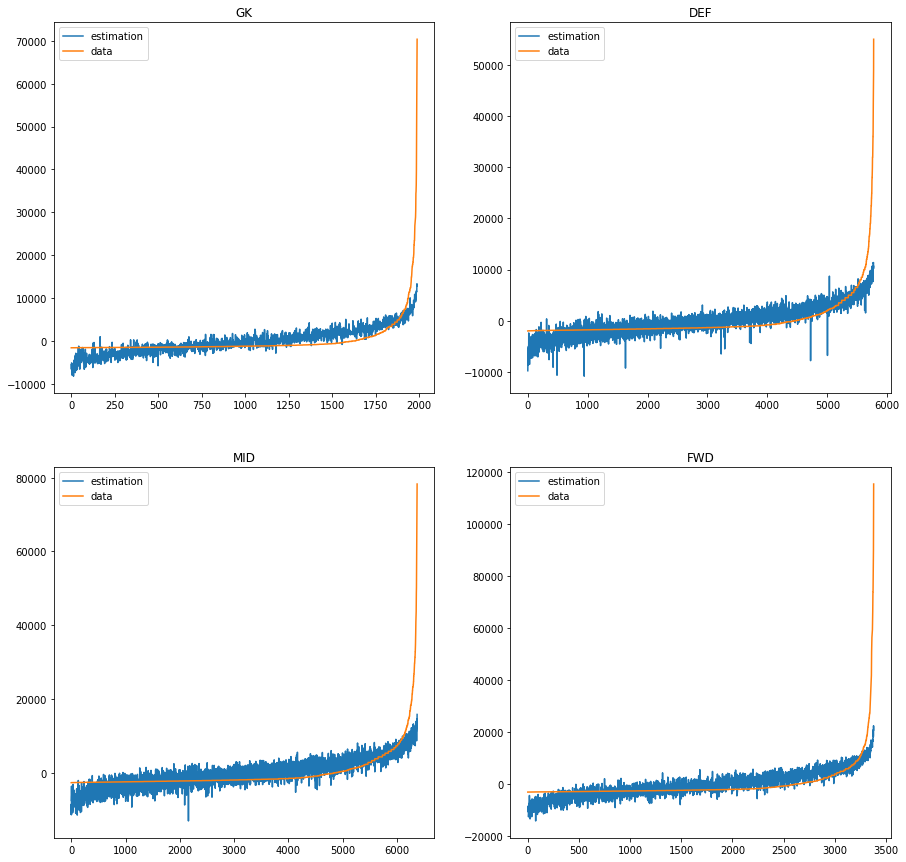

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste(p)
    plot_poste_vs_what(data, value, ax=ax[i//2, i%2], title=p)

On se rend compte que l'estimation n'arrive pas à suivre les données en particulier pour les plus grandes
valeurs qui explosent. En fait on veut approcher avec une combinaison **linéaire** une courbe plus qu'exponentielle.

Regardons la courbe des salaires en échelle logarithmique :

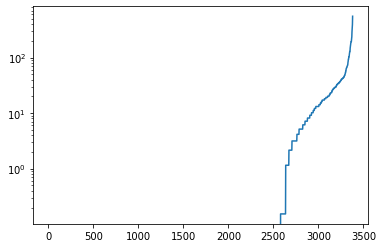

In [37]:
plt.plot(np.arange(len(wage)), np.sort(wage))
plt.yscale('log')

Le résultat ressemble encore à une exponentielle. Aussi on va cherche a estimer le `log(log(wage))` et si on y
arrive, il suffira de faire `exp(exp(estimation))` pour avoir le bon salaire.

Attention, le log ne veut pas de valeurs négatives donc il faut modifier `wage`. De même une matrice ne peut pas ajouter une constante aux valeur aussi il faut penser à centrer les nouvelles valeurs avant d'utiliser le speudo-inverse (essayez sans centrer et en centrant pour voir la différence).

In [38]:
def plot_poste_vs_what2(data, what, nb_exp=0, ax=plt, title=None):
    
    data = data.values
    
    N,M = data.shape
    U, S, VT = lin.svd(data)
    
    to_add2 = np.zeros((M - N, N))
    S2 = np.vstack((np.diag(1/S), to_add2))
    
    AP = VT.T @ S2 @ U.T
    magic = AP.T @ what
    
    estimation = data.T @ magic
    idx = np.argsort(what)
    
    if (nb_exp == 1):
        ax.plot(np.arange(M), np.exp(estimation[idx]), label='estimation')
        ax.plot(np.arange(M), np.exp(what[idx]), label='data')
        if title != None:
            ax.set_title(title)
        ax.legend()
    
    elif (nb_exp == 2):
        ax.plot(np.arange(M), np.exp(np.exp(estimation[idx])), label='estimation')
        ax.plot(np.arange(M), np.exp(np.exp(what[idx])), label='data')
        if title != None:
            ax.set_title(title)
        ax.legend()
    
    else:
        ax.plot(np.arange(M), estimation[idx], label='estimation')
        ax.plot(np.arange(M), what[idx], label='data')
        if title != None:
            ax.set_title(title)
        ax.legend()

In [39]:
def data_par_poste2(poste):
    data = fifa19[fifa19['Poste'] == poste][columns].copy()
    data['Value'] = data['Value'].apply(money)
    data['Wage'] = data['Wage'].apply(money)
    data['Height'] = data['Height'].apply(to_meters)
    data['Weight'] = data['Weight'].apply(lambda x: int(0.453592 * float(x[:-3])))
    data.dropna(inplace=True)
    
    data -= data.min(axis=0) - 0.1
    data['Wage'] = np.log(data['Wage'])
    data['Value'] = np.log(data['Value'])
    
    data -= data.min(axis=0) - 0.1
    data['Wage'] = np.log(data['Wage'])
    
    data_mean = data.mean(axis=0)
    data -= data_mean

    value = data['Value'].values
    wage = data['Wage'].values
    overall = data['Overall'].values
    data.drop(columns=['Value', 'Wage', 'Overall'], inplace=True)

    return data.to_xarray().to_array(), overall, value, wage

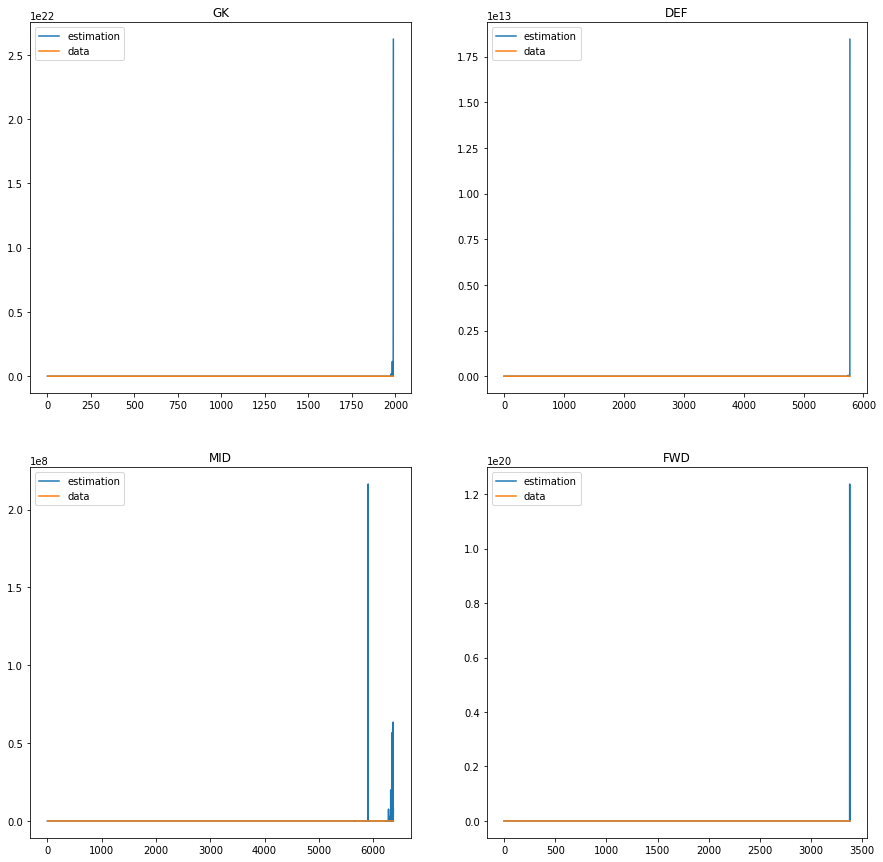

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste2(p)
    plot_poste_vs_what2(data, wage,2, ax=ax[i//2, i%2], title=p)

Faire la même chose avec la valeur financière des joueurs, `value`. Ici un simple log suffit pour avoir
de bon résultats.

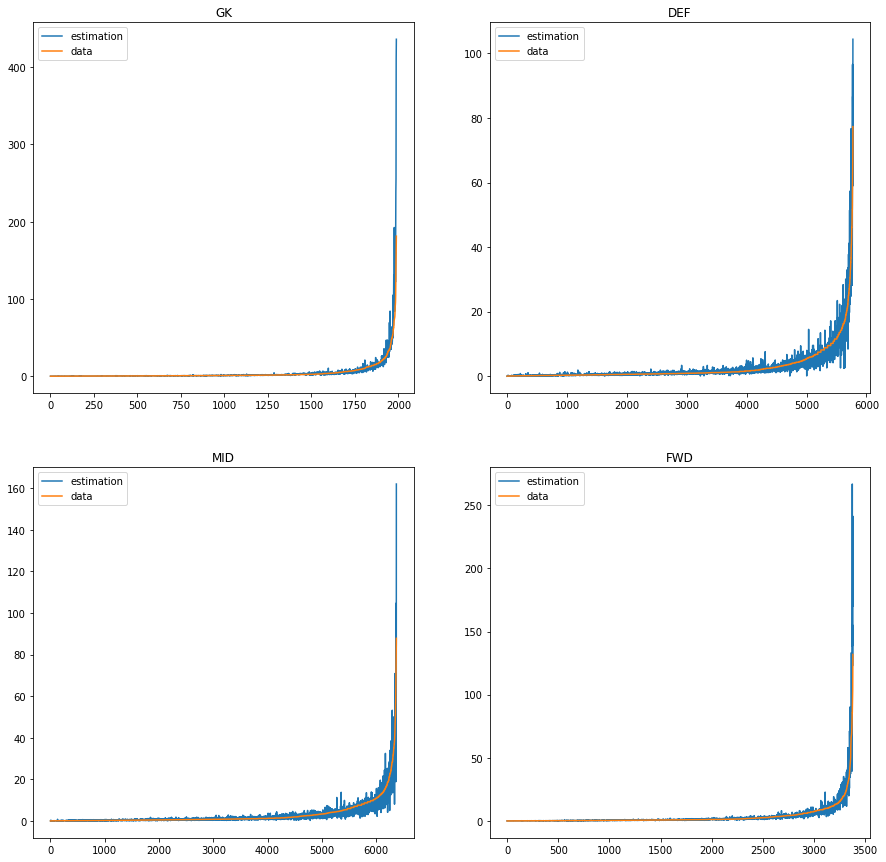

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste2(p)
    plot_poste_vs_what2(data, value,1, ax=ax[i//2, i%2], title=p)

Si on arrive assez bien a estimer la note globale que Fifa19 donne aux joueurs, on constate qu'on n'y arrive
moins bien avec les salaires. Cela laisse entendre que la relation entre les salaires et
la note globale des joueurs n'est pas estimée de la même facon par Fifa19 (peut-être qu'ils s'agit
des salaires réels) et par notre calcul. Cela laisse donc la
place pour faire de bonnes affaires à savoir acheter des joueurs perfomants mais mal payés.

## Mon équipe

Pour chacun des 4 postes, trouver les 5 joueurs les plus rentables à savoir ceux dont l'écart entre le salaire qu'estime la SVD et le salaire
du jeu est le plus grand (si la SVD estime qu'il faudrait payer tel joueur 100 mais qu'il ne demande que 60 dans le jeu, c'est bon).

On rangera les joueurs par intérêt (du moins rentable au plus rentable) pour chaque poste dans
le dictionnaire `team`.

In [42]:
def plot_poste_vs_what_ordre_2(data, what, nb_exp=0, ax=plt, title=None):
    
    data = data.values
    
    N,M = data.shape
    U, S, VT = lin.svd(data)
    
    to_add2 = np.zeros((M - N, N))
    S2 = np.vstack((np.diag(1/S), to_add2))
    
    AP = VT.T @ S2 @ U.T
    magic = AP.T @ what
    
    estimation = data.T @ magic
    idx = np.argsort(what)
    
    if (nb_exp == 1):
        estimation = np.exp(estimation)
        what = np.exp(what)
    
    elif (nb_exp == 2):
        estimation = np.exp(np.exp(estimation))
        what = np.exp(np.exp(what))
        
        
    cmp = estimation - what
    return np.argsort(-cmp) # descending order

In [43]:
team = {}
for i,p in enumerate(['GK', 'DEF', 'MID', 'FWD']):
    data, overall, value, wage = data_par_poste2(p)
    team[p] = plot_poste_vs_what_ordre_2(data, wage,2, ax=ax[i//2, i%2], title=p)

In [44]:
team

{'GK': array([  0,   4,   1, ..., 331, 213,  79], dtype=int64),
 'DEF': array([  0,   1,   6, ..., 478, 359, 219], dtype=int64),
 'MID': array([192,   1,   3, ...,  74,  35, 206], dtype=int64),
 'FWD': array([  1,   4,   0, ..., 967, 481, 378], dtype=int64)}

In [45]:
team['GK'][:5]

array([0, 4, 1, 2, 6], dtype=int64)

In [46]:
# les moins rentables du point de vue salaire estimé vs salaire du jeu
fifa19.loc[fifa19['Poste'] == 'GK',['Name','Overall','Wage','Value']].iloc[team['GK'][:5]]

,Name,Overall,Wage,Value
3,De Gea,91,€260K,€72M
22,M. Neuer,89,€130K,€38M
9,J. Oblak,90,€94K,€68M
18,M. ter Stegen,89,€240K,€58M
40,S. Handanovič,88,€110K,€30M


In [47]:
# les plus rentables
fifa19.loc[fifa19['Poste'] == 'GK',['Name','Overall','Wage','Value']].iloc[team['GK'][-5:]]

,Name,Overall,Wage,Value
4591,F. Nita,71,€1K,€1.5M
1549,T. Kraft,76,€21K,€5M
3631,A. Silbeira,72,€0,€0
2312,A. Boruc,74,€24K,€375K
697,Kiko Casilla,79,€105K,€7.5M


In [48]:
fifa19.loc[fifa19['Poste'] == 'DEF',['Name','Overall','Wage','Value']].iloc[team['DEF'][-5:]]

,Name,Overall,Wage,Value
2544,J. Sánchez Miño,74,€18K,€4.4M
3594,Torrejón,72,€20K,€1.8M
1655,N. Araújo,75,€20K,€7M
1282,Alexo Baia,76,€25K,€5.5M
785,C. Izquierdoz,78,€25K,€8M


In [49]:
fifa19.loc[fifa19['Poste'] == 'MID',['Name','Overall','Wage','Value']].iloc[team['MID'][-5:]]

,Name,Overall,Wage,Value
459,Portu,80,€37K,€17.5M
3072,João Amaral,73,€9K,€4.3M
215,Javi Martínez,83,€94K,€20M
119,Marquinhos,84,€90K,€35.5M
572,L. Tousart,79,€43K,€14.5M


In [50]:
fifa19.loc[fifa19['Poste'] == 'FWD',['Name','Overall','Wage','Value']].iloc[team['FWD'][-5:]]

,Name,Overall,Wage,Value
3303,M. Pérez,72,€4K,€3.3M
3409,Y. Orozco,72,€4K,€3.3M
5067,M. Robak,70,€4K,€825K
2467,M. Ruben,74,€17K,€5M
1940,Borja Bastón,75,€29K,€8.5M
